<a href="https://colab.research.google.com/github/elizabethavargas/baseball/blob/main/Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Hit a Home Run
Visualizations of associations with extra base hits and home runs

In [1]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("/content/baseball_numbers_2024.csv")
df2

,Unnamed: 0,game_date,game_pk,gametype,site,hometeam,date,season,daynight,starttime,...,launch_speed,launch_angle,age_bat,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run
0,0,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,87.6,-30.0,35.0,FF,R,R,1.0,0.0,field_out,0.0
1,1,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,72.0,21.0,30.0,SL,R,R,1.0,0.0,single,0.0
2,2,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,76.1,58.0,30.0,FF,L,R,0.0,0.0,field_out,0.0
3,3,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,86.7,-25.0,34.0,FF,R,R,1.0,0.0,field_out,0.0
4,4,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,107.2,35.0,31.0,CU,L,R,0.0,1.0,home_run,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71022,71022,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,66.6,-31.0,24.0,FC,L,L,1.0,0.0,field_error,0.0
71023,71023,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,75.5,-48.0,30.0,CH,R,L,0.0,0.0,field_out,0.0
71024,71024,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,83.7,-6.0,31.0,CH,R,L,0.0,0.0,single,0.0
71025,71025,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,97.5,-26.0,33.0,FC,L,L,1.0,0.0,field_out,0.0


In [2]:
df2['handedness_combos'] = df2['stand'].astype(str) + '_' + df2['p_throws'].astype(str)

handedness_combos_map = {
    'RR': 0,
    'LL': 1,
    'RL': 2,
    'LR': 3
}
df2['handedness_combos_int'] = pd.Categorical(df2["handedness_combos"]).codes
df2

,Unnamed: 0,game_date,game_pk,gametype,site,hometeam,date,season,daynight,starttime,...,age_bat,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run,handedness_combos,handedness_combos_int
0,0,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,35.0,FF,R,R,1.0,0.0,field_out,0.0,R_R,3
1,1,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,30.0,SL,R,R,1.0,0.0,single,0.0,R_R,3
2,2,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,30.0,FF,L,R,0.0,0.0,field_out,0.0,L_R,1
3,3,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,34.0,FF,R,R,1.0,0.0,field_out,0.0,R_R,3
4,4,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024.0,day,2024-09-30T17:11:00.000Z,...,31.0,CU,L,R,0.0,1.0,home_run,1.0,L_R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71022,71022,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,24.0,FC,L,L,1.0,0.0,field_error,0.0,L_L,0
71023,71023,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,30.0,CH,R,L,0.0,0.0,field_out,0.0,R_L,2
71024,71024,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,31.0,CH,R,L,0.0,0.0,single,0.0,R_L,2
71025,71025,2024-06-12,746462,R,Comerica Park,Detroit Tigers,2024-06-12T22:40:00Z,2024.0,night,2024-06-12T22:40:00.000Z,...,33.0,FC,L,L,1.0,0.0,field_out,0.0,L_L,0


In [3]:
df2.events.value_counts()

,count
events,
field_out,42589
single,15045
double,4590
home_run,3348
force_out,1996
grounded_into_double_play,1863
field_error,602
triple,392
fielders_choice,219


## Launch Angle, Launch Speed, and Extra Base Hits

In [ ]:
def categorize_event(event):
    if event in ['single', 'double', 'triple', 'home_run']:
        return event
    else:
        return 'other'

df2['event_category'] = df2['events'].apply(categorize_event)
df2['event_category'].value_counts()

,count
event_category,
other,82373
single,25841
double,7771
home_run,5450
triple,696


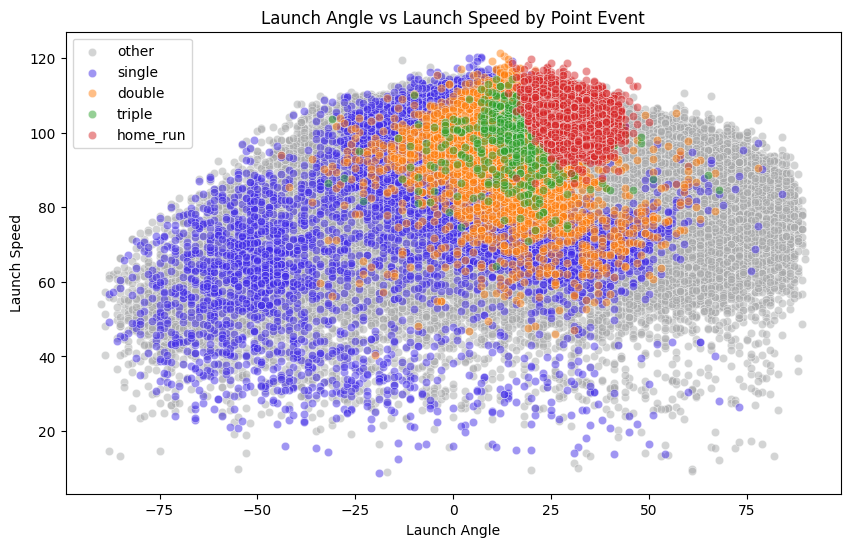

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
custom_palette = {
    "other": "#a9aaab",
    "single": "#412ce6",
    "double": "#ff7f0e",
    "triple": "#2ca02c",
    "home_run": "#d62728"
}

for event_category, color in custom_palette.items():
  sns.scatterplot(
      data=df2[df2['event_category'] == event_category],
      x='launch_angle', y='launch_speed',
      color=color, alpha=0.5, label=event_category
  )


plt.title('Launch Angle vs Launch Speed by Point Event')
plt.xlabel('Launch Angle')
plt.ylabel('Launch Speed')
plt.legend()
plt.show()


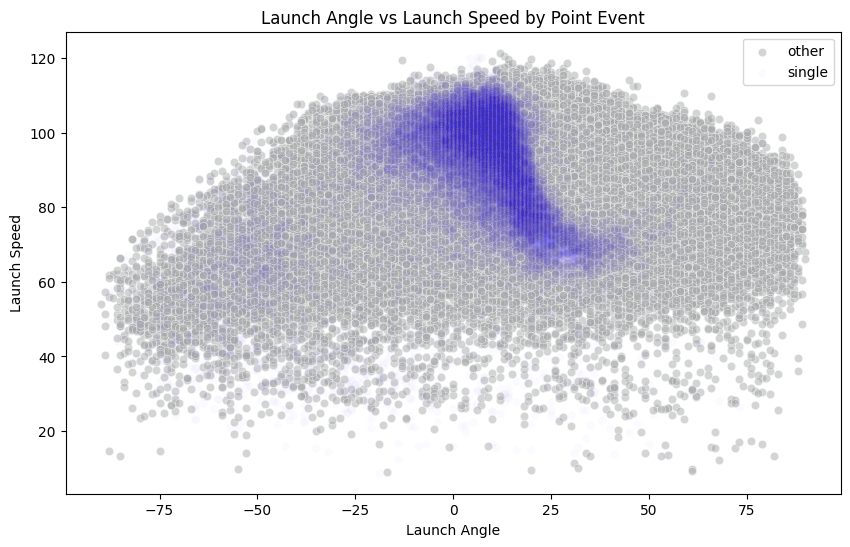

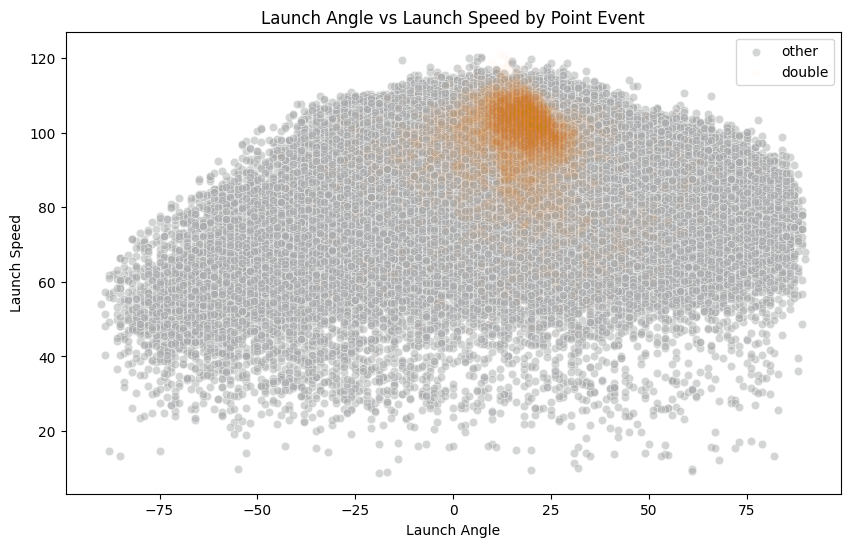

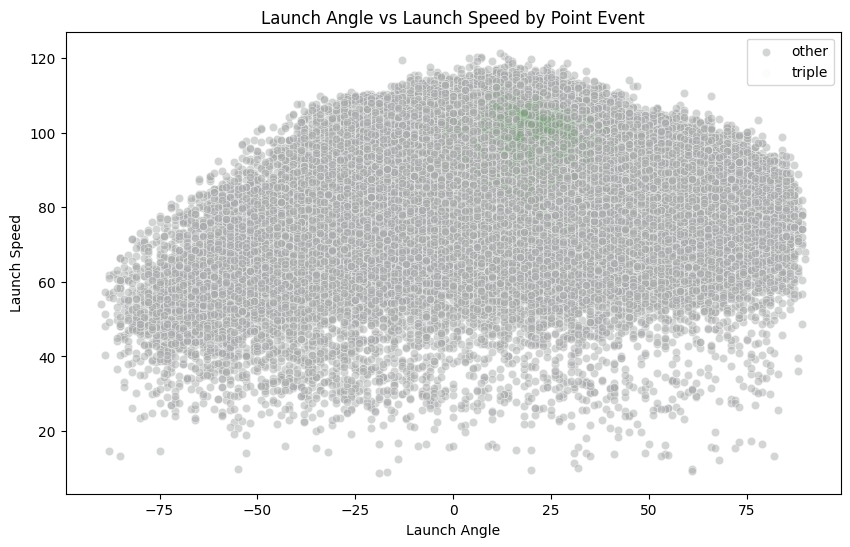

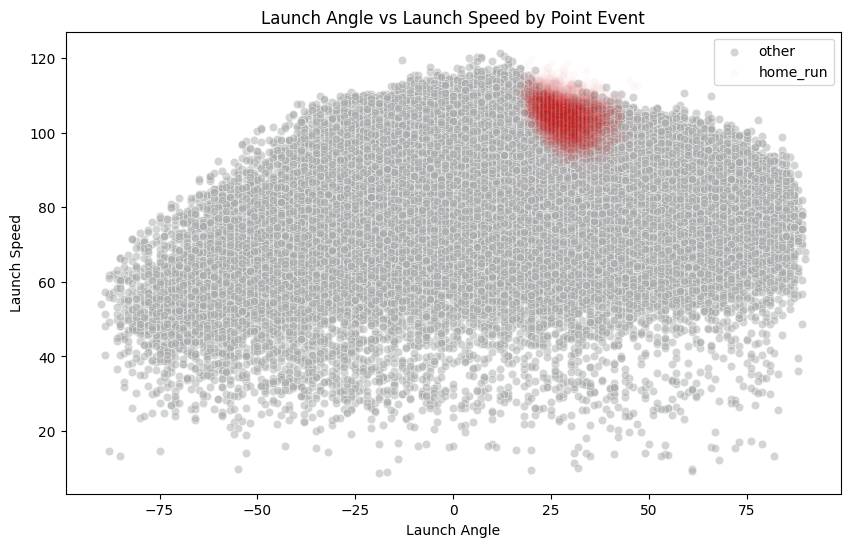

In [ ]:
for event_category in ['single', 'double', 'triple', 'home_run']:

  plt.figure(figsize=(10, 6))
  sns.scatterplot(
      data=df2[df2['event_category'] != event_category],
      x='launch_angle', y='launch_speed',
      color=custom_palette['other'], alpha=0.5, label="other")

  sns.scatterplot(
      data=df2[df2['event_category'] == event_category],
      x='launch_angle', y='launch_speed',
      color=custom_palette[event_category], alpha=0.02, label=event_category)


  plt.title('Launch Angle vs Launch Speed by Point Event')
  plt.xlabel('Launch Angle')
  plt.ylabel('Launch Speed')
  plt.legend()
  plt.show()


In [ ]:
df2

,Unnamed: 0,game_date,game_pk,gametype,site,hometeam,date,season,daynight,starttime,...,pitch_type,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run,handedness_combos,handedness_combos_int,event_category
0,0,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,FF,R,R,1,0,field_out,0,R_R,3,other
1,1,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,SL,R,R,1,0,single,0,R_R,3,single
2,2,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,FF,L,R,0,0,field_out,0,L_R,1,other
3,3,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,FF,R,R,1,0,field_out,0,R_R,3,other
4,4,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,CU,L,R,0,1,home_run,1,L_R,1,home_run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122126,122126,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,SI,L,R,0,0,single,0,L_R,1,single
122127,122127,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,FF,R,R,1,0,field_out,0,R_R,3,other
122128,122128,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,FF,R,R,1,0,field_out,0,R_R,3,other
122129,122129,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,FF,R,R,1,0,field_out,0,R_R,3,other


## Is there a barrel of doubles?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.path import Path

def build_double_barrel_detector(df,
                                 angle_col='launch_angle',
                                 speed_col='launch_speed',
                                 bandwidth=3.0,
                                 grid_size=200,
                                 percentile=95):
    """
    Build a detector for the "double barrel" zone.
    - df: DataFrame limited to rows where event == 'double'
    - bandwidth: KDE bandwidth (tuneable)
    - grid_size: resolution of the grid used to compute density
    - percentile: the percentile of density to use as the contour threshold (e.g. 95 -> top 5% densest)

    Returns: is_in_double_barrel(point) where point is (angle, speed),
             plus a dict with supporting objects (kde, grid, density, polygon_path).
    """
    # 1) extract numpy array
    pts = df[[angle_col, speed_col]].dropna().to_numpy()
    if pts.shape[0] < 10:
        raise ValueError("Not enough double samples to estimate density reliably.")

    # 2) fit KDE on the doubles
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(pts)

    # 3) grid over the range of data (a little margin)
    angle_min, angle_max = pts[:,0].min(), pts[:,0].max()
    speed_min, speed_max = pts[:,1].min(), pts[:,1].max()
    angle_pad = (angle_max - angle_min) * 0.05
    speed_pad = (speed_max - speed_min) * 0.05
    a_lin = np.linspace(angle_min - angle_pad, angle_max + angle_pad, grid_size)
    s_lin = np.linspace(speed_min - speed_pad, speed_max + speed_pad, grid_size)
    A, S = np.meshgrid(a_lin, s_lin)
    grid_points = np.vstack([A.ravel(), S.ravel()]).T

    # 4) evaluate log density on grid and convert to density
    log_d = kde.score_samples(grid_points)
    d = np.exp(log_d).reshape(grid_size, grid_size)

    # 5) choose contour threshold by percentile of grid density values
    threshold = np.percentile(d, percentile)

    # 6) extract contour lines at that threshold using matplotlib (no plot needed)
    fig = plt.figure(figsize=(1,1))
    ax = fig.add_subplot(111)
    # contour returns a QuadContourSet. We won't show the figure.
    cs = ax.contour(a_lin, s_lin, d, levels=[threshold])
    plt.close(fig)

    # If the contour doesn't exist (very rare), fall back to convex hull of top fraction points
    if len(cs.allsegs[0]) == 0:
        # fallback: use points above threshold density
        above_idx = d.ravel() >= threshold
        pts_above = grid_points[above_idx]
        if pts_above.shape[0] == 0:
            raise RuntimeError("Unable to construct contour or fallback polygon.")
        # convex hull fallback
        from scipy.spatial import ConvexHull
        hull = ConvexHull(pts_above)
        hull_pts = pts_above[hull.vertices]
        polygon_path = Path(hull_pts)
    else:
        # there can be multiple contour polygons; pick the largest (by number of points)
        segs = cs.allsegs[0]
        largest = max(segs, key=lambda seg: seg.shape[0])
        polygon_path = Path(largest)

    # 7) detector function
    def is_in_double_barrel(point):
        # point can be (angle, speed) or array-like
        arr = np.asarray(point).reshape(-1, 2)
        return np.array([polygon_path.contains_point(tuple(p)) for p in arr])

    meta = {
        "kde": kde,
        "grid_x": a_lin,
        "grid_y": s_lin,
        "density_grid": d,
        "threshold": threshold,
        "polygon_path": polygon_path
    }
    return is_in_double_barrel, meta


In [ ]:
# assuming `df_all` is your full dataset with columns 'launch_angle', 'launch_speed', 'event'
df_doubles = df2[df2['events'] == 'double']

# build detector (tune bandwidth and percentile)
is_double_barrel, meta = build_double_barrel_detector(df_doubles,
                                                     bandwidth=3.0,
                                                     grid_size=300,
                                                     percentile=97)

# test a point
print(is_double_barrel((22.5, 100)))   # True/False


[ True]


In [ ]:
df2['double_barrel'] = df2.apply(lambda row: is_double_barrel((row['launch_angle'], row['launch_speed'])), axis=1)
df2

,Unnamed: 0,game_date,game_pk,gametype,site,hometeam,date,season,daynight,starttime,...,stand,p_throws,pitcher_batter_handedness,barrel,events,home_run,handedness_combos,handedness_combos_int,event_category,double_barrel
0,0,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,R,R,1,0,field_out,0,R_R,3,other,[False]
1,1,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,R,R,1,0,single,0,R_R,3,single,[False]
2,2,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,L,R,0,0,field_out,0,L_R,1,other,[False]
3,3,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,R,R,1,0,field_out,0,R_R,3,other,[False]
4,4,2024-09-30,747139,R,Truist Park,Atlanta Braves,2024-09-30T17:10:00Z,2024,day,2024-09-30T17:11:00.000Z,...,L,R,0,1,home_run,1,L_R,1,home_run,[False]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122126,122126,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,L,R,0,0,single,0,L_R,1,single,[False]
122127,122127,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,R,R,1,0,field_out,0,R_R,3,other,[False]
122128,122128,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,R,R,1,0,field_out,0,R_R,3,other,[False]
122129,122129,2024-03-20,745444,R,Gocheok Sky Dome,San Diego Padres,2024-03-20T10:05:00Z,2024,night,2024-03-20T10:07:00.000Z,...,R,R,1,0,field_out,0,R_R,3,other,[False]


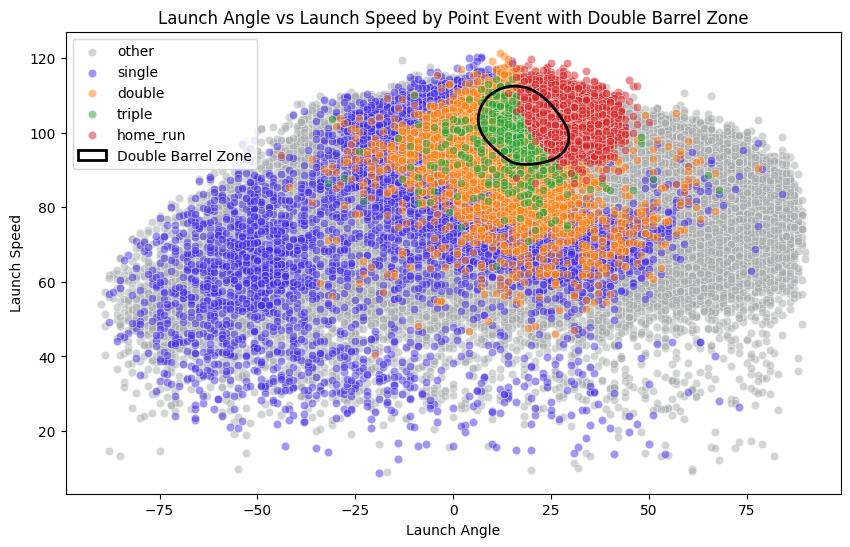

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

plt.figure(figsize=(10, 6))
custom_palette = {
    "other": "#a9aaab",
    "single": "#412ce6",
    "double": "#ff7f0e",
    "triple": "#2ca02c",
    "home_run": "#d62728"
}

for event_category, color in custom_palette.items():
  sns.scatterplot(
      data=df2[df2['event_category'] == event_category],
      x='launch_angle', y='launch_speed',
      color=color, alpha=0.5, label=event_category
  )

# Add the double barrel polygon to the plot
if 'polygon_path' in meta:
    patch = PathPatch(meta['polygon_path'], facecolor='none', edgecolor='black', lw=2, label='Double Barrel Zone')
    plt.gca().add_patch(patch)


plt.title('Launch Angle vs Launch Speed by Point Event with Double Barrel Zone')
plt.xlabel('Launch Angle')
plt.ylabel('Launch Speed')
plt.legend()
plt.show()

In [ ]:
db_events = df2[df2['double_barrel'] == 1].events.value_counts()
db_events

,count
events,
field_out,7606
single,5889
double,4796
home_run,2039
triple,418
double_play,62
field_error,26
force_out,14
grounded_into_double_play,6


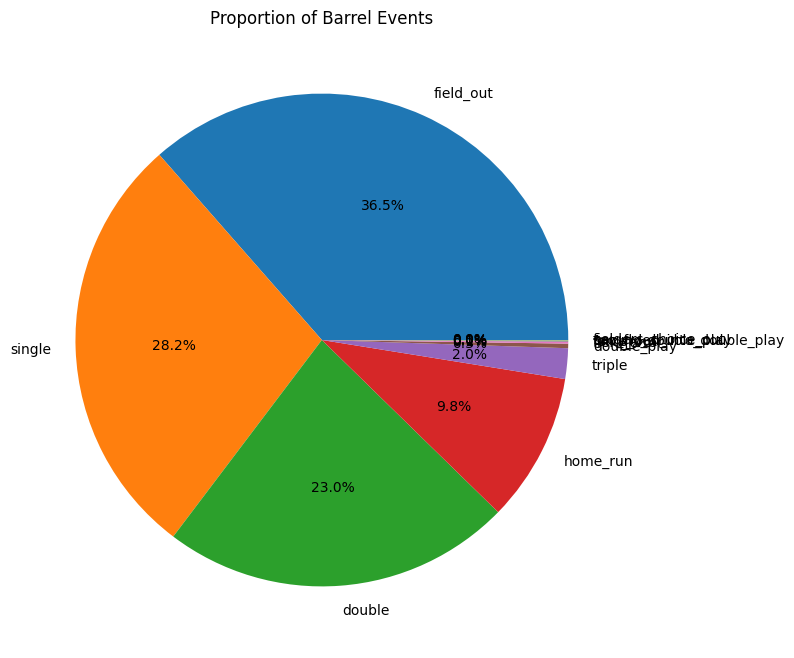

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(db_events.values, labels=db_events.index, autopct='%1.1f%%')
plt.title('Proportion of Barrel Events')
plt.show()

## Barrels: If its not a home run, what is it?

In [ ]:
df2[df2.barrel == 1].events.value_counts()

,count
events,
home_run,4345
field_out,2138
double,1659
single,194
triple,178
field_error,8
double_play,7
sac_fly_double_play,1
force_out,1


In [1]:
plt.figure(figsize=(8, 8))
plt.pie(db_events.values, labels=db_events.index, autopct='%1.1f%%')
plt.title('Proportion of Barrel Events')
plt.show()

NameError: name 'plt' is not defined

In [3]:
import pandas as pd

# Define the lower and upper boundary points of the barrel zone
points = [
    # Lower boundary (increasing velocity)
    (98, 26),
    (110, 8),
    (120, 8),
    # Upper boundary (reverse order to close polygon)
    (120, 50),
    (110, 50),
    (98, 30)
]

# Build DataFrame
df = pd.DataFrame(points, columns=["exit_velocity", "launch_angle"])
df["zone"] = "barrel"
df["path_order"] = range(len(df))  # helps Tableau connect the polygon correctly

# Save to CSV
df.to_csv("barrel_zone.csv", index=False)

print(df)




   exit_velocity  launch_angle    zone  path_order
0             98            26  barrel           0
1            110             8  barrel           1
2            120             8  barrel           2
3            120            50  barrel           3
4            110            50  barrel           4
5             98            30  barrel           5
